##**Importando os dados:**

In [2]:
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('autos.csv', encoding = 'ISO-8859-1')

In [4]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


**Retirei algumas outliers, pois alguns dados estão desconexos, exemplo, veículos de 11 milhões de Euros, 99 milhões de Euros, preço abaixo dos 100 Euros, etc.**

In [5]:
df = df[df["price"] > 100]
df = df[df["price"] < 350000]

**Verificando valores nulos: Vamos retira-los, pois na criação de modelos de machine learning eles serão tratados:**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357057 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          357057 non-null  object
 1   name                 357057 non-null  object
 2   seller               357057 non-null  object
 3   offerType            357057 non-null  object
 4   price                357057 non-null  int64 
 5   abtest               357057 non-null  object
 6   vehicleType          324462 non-null  object
 7   yearOfRegistration   357057 non-null  int64 
 8   gearbox              340638 non-null  object
 9   powerPS              357057 non-null  int64 
 10  model                339432 non-null  object
 11  kilometer            357057 non-null  int64 
 12  monthOfRegistration  357057 non-null  int64 
 13  fuelType             328604 non-null  object
 14  brand                357057 non-null  object
 15  notRepairedDamage    292331 non-nu

In [7]:
df.dropna(inplace=True)

In [8]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Angebot,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,0,96224,2016-04-06 10:45:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,2016-03-19 19:53:49,turbo_defekt,privat,Angebot,3200,control,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,2016-03-19 00:00:00,0,96465,2016-03-19 20:44:43
371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,privat,Angebot,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,2016-03-27 00:00:00,0,26624,2016-03-29 10:17:23
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


**Vamos também retirar algumas Features, algumas delas contém 2 tipos de amostras, sendo que um dos tipos só tem 1 amostra, não será válido, por exemplo, a "seller" é dividida em privada e comercial, só existe 1 amostra como comercial.**

In [9]:
df.drop(columns=["name", "dateCrawled", "dateCreated", "lastSeen", "postalCode", "seller", "offerType", "nrOfPictures"], inplace=True)

In [10]:
df

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
5,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja
6,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein
10,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371520,3200,control,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja
371521,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein
371524,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256568 entries, 3 to 371527
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   price                256568 non-null  int64 
 1   abtest               256568 non-null  object
 2   vehicleType          256568 non-null  object
 3   yearOfRegistration   256568 non-null  int64 
 4   gearbox              256568 non-null  object
 5   powerPS              256568 non-null  int64 
 6   model                256568 non-null  object
 7   kilometer            256568 non-null  int64 
 8   monthOfRegistration  256568 non-null  int64 
 9   fuelType             256568 non-null  object
 10  brand                256568 non-null  object
 11  notRepairedDamage    256568 non-null  object
dtypes: int64(5), object(7)
memory usage: 25.4+ MB


## **Analisando estatísticamente o Target - Price**

### **Correlação:**

**Vemos abaixo nos dois gráficos que há correlações positivas altas e baixas e negativas de acordo com a correlação de Pearson.**

In [12]:
df.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
price,1.000000,0.404142,0.253688,-0.435284,0.015924
yearOfRegistration,0.404142,1.000000,0.102698,-0.401193,0.029300
powerPS,0.253688,0.102698,1.000000,-0.016800,0.013877
kilometer,-0.435284,-0.401193,-0.016800,1.000000,-0.005122
monthOfRegistration,0.015924,0.029300,0.013877,-0.005122,1.000000


**Correlação de Pearson:**

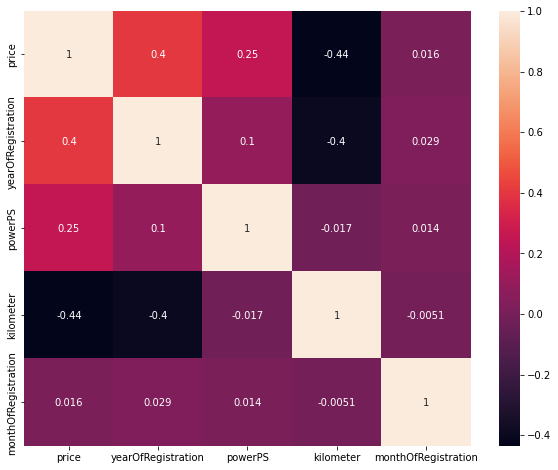

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

**Correlação de Spearman:**

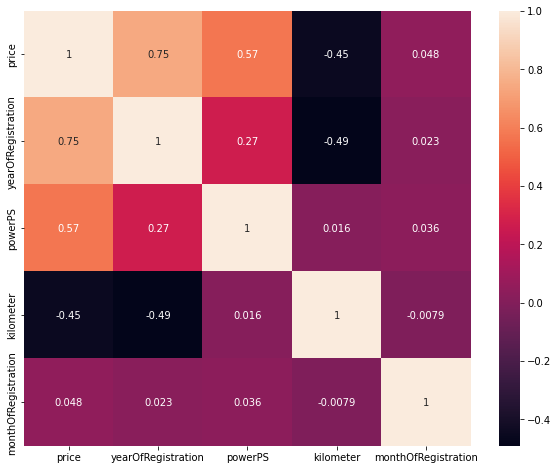

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr("spearman"), annot=True)

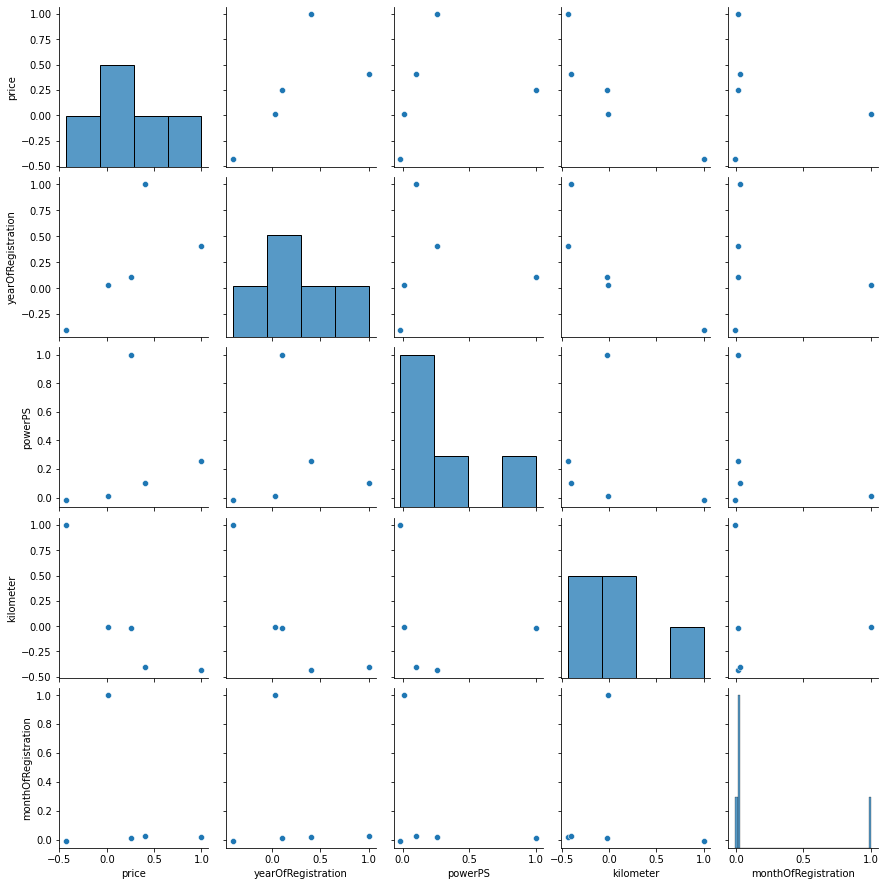

In [15]:
sns.pairplot(df.corr());

###**Intervalo de confiança - Média dos valores do preço dos veículos**

**Nível de confiança = 95%**

Iremos pegar 100 amostras aleatórias:

In [16]:
import random
lista = []
for num in df["price"]:
  lista.append(num)
dados = random.sample(lista,100)

Média amostral:

In [17]:
media = pd.DataFrame(dados).mean()
media = media[0]
media

6379.83

Desvio padrão amostral:

In [18]:
desvio_padrao = pd.DataFrame(dados).std()
desvio_padrao  = desvio_padrao[0]
desvio_padrao 

7761.652267417231

Número de amostras:

In [19]:
n = len(dados)
n

100

**Irei usar o Scipy como ferramenta:**

In [20]:
from scipy.stats import norm
from scipy import stats
import math

**Calculando o intervalo com margem de erro:**

In [21]:
stats.sem(dados)

776.1652267417231

In [22]:
intervalos = norm.interval(0.95, media, stats.sem(dados))
intervalos

(4858.574109533858, 7901.085890466142)

In [23]:
margem_erro = media - intervalos[0]
margem_erro

1521.2558904661419

**Temos 95% de confiança que a média geral do valores dos preços dos veículos estará entre 6.090,69 e 11.056,20 Euros com uma margem de erro de 2.482,75 Euros para mais e para menos**

**De fato confirmamos abaixo que a média geral está dentro do intervalo:**

In [24]:
df["price"].mean()

6792.735543793458

### **Avaliando os quartis dos preços:**

In [25]:

Q1 = df["price"].quantile(q=0.25) # Primeiro quartil
Q2 = df["price"].quantile(q=0.50) # Segundo quartil
Q3 = df["price"].quantile(q=0.75) # Terceiro quartil

IQR = Q3 - Q1 # Intervalo interquartílico
inf = Q1 - 1.5 * IQR
sup = Q3 + 1.5 * IQR
media = df["price"].mean()
mediana = df["price"].median()
moda = df["price"].value_counts().index[0]

print(f"Primeiro quartil: {Q1}")
print(f"Segundo quartil: {Q2}")
print(f"Terceiro quartil: {Q3}")
print(f"Intervalo interquartílico: {IQR}")
print(f"Limite superior: {sup}")
print(f"Limite inferior: {inf}")
print(f"Média geral: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda-Valor mais frequente: {moda:.2f}")


Primeiro quartil: 1600.0
Segundo quartil: 3950.0
Terceiro quartil: 8800.0
Intervalo interquartílico: 7200.0
Limite superior: 19600.0
Limite inferior: -9200.0
Média geral: 6792.74
Mediana: 3950.00
Moda-Valor mais frequente: 1500.00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


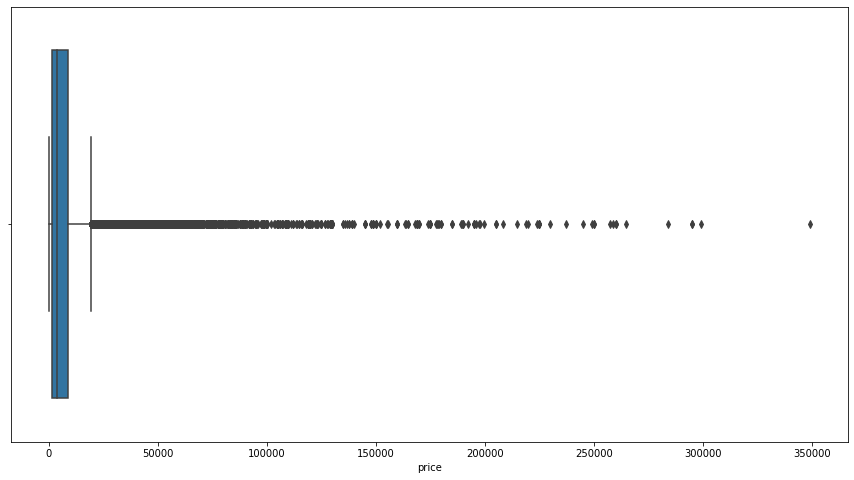

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(df["price"]);

**Apenas para visualizar melhor os quartis vamos retirar alguns outliers, mas manteremos eles durante a análise.**

In [27]:
veiculos = df[df["price"] < 25000]
veiculos

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
5,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja
6,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein
10,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371518,3999,test,kombi,2005,manuell,3,3er,150000,5,diesel,bmw,nein
371520,3200,control,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja
371521,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein
371524,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


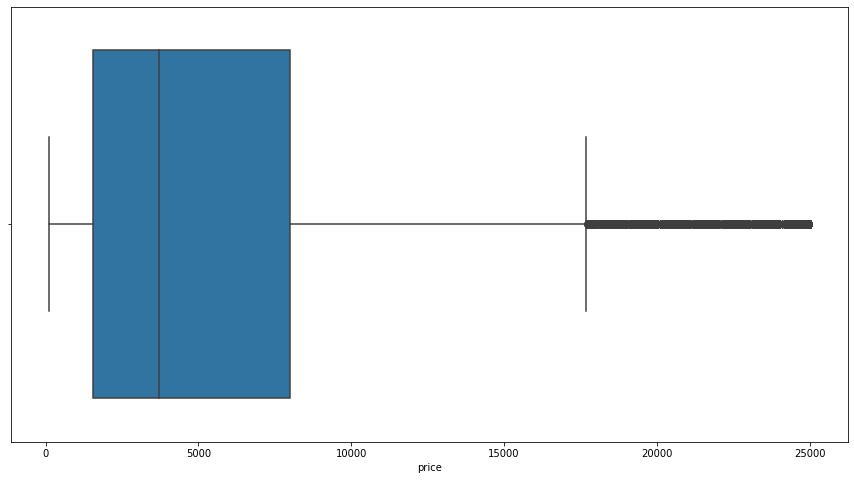

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(veiculos["price"]);

### **Assimetria positiva =>  moda <= mediana <= média**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


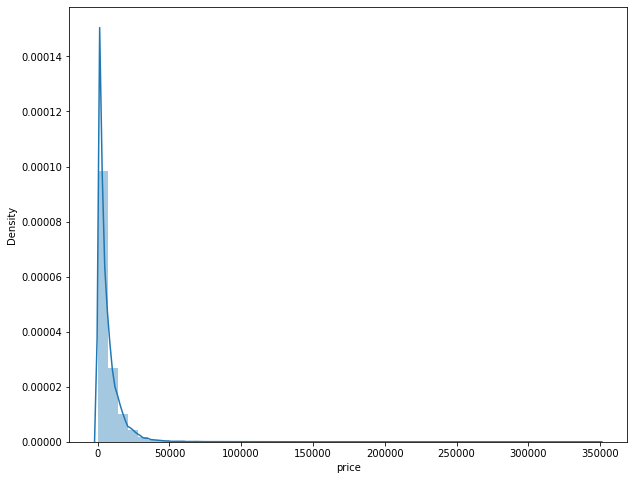

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(df["price"]);

### **Avaliando a medida de curtose:**

**Para valores abaixo de 0.263 => O resultado identificou como Leptocúrtica, mostrando que a maior concentração dos seus dados se dá em torno do seu centro:**

In [30]:
Q10 = df["price"].quantile(q=0.1) # Décimo quartil
Q90 = df["price"].quantile(q=0.9) # Nonagésimo quartil
(Q3-Q1)/(2*(Q90-Q10))

0.2369980250164582

## **Variedade e média de preços por fabricante:**

In [31]:
df

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
5,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja
6,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein
10,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371520,3200,control,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja
371521,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein
371524,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein


#**Quais fabricantes tem a média de preço dos veículos mais caras?**

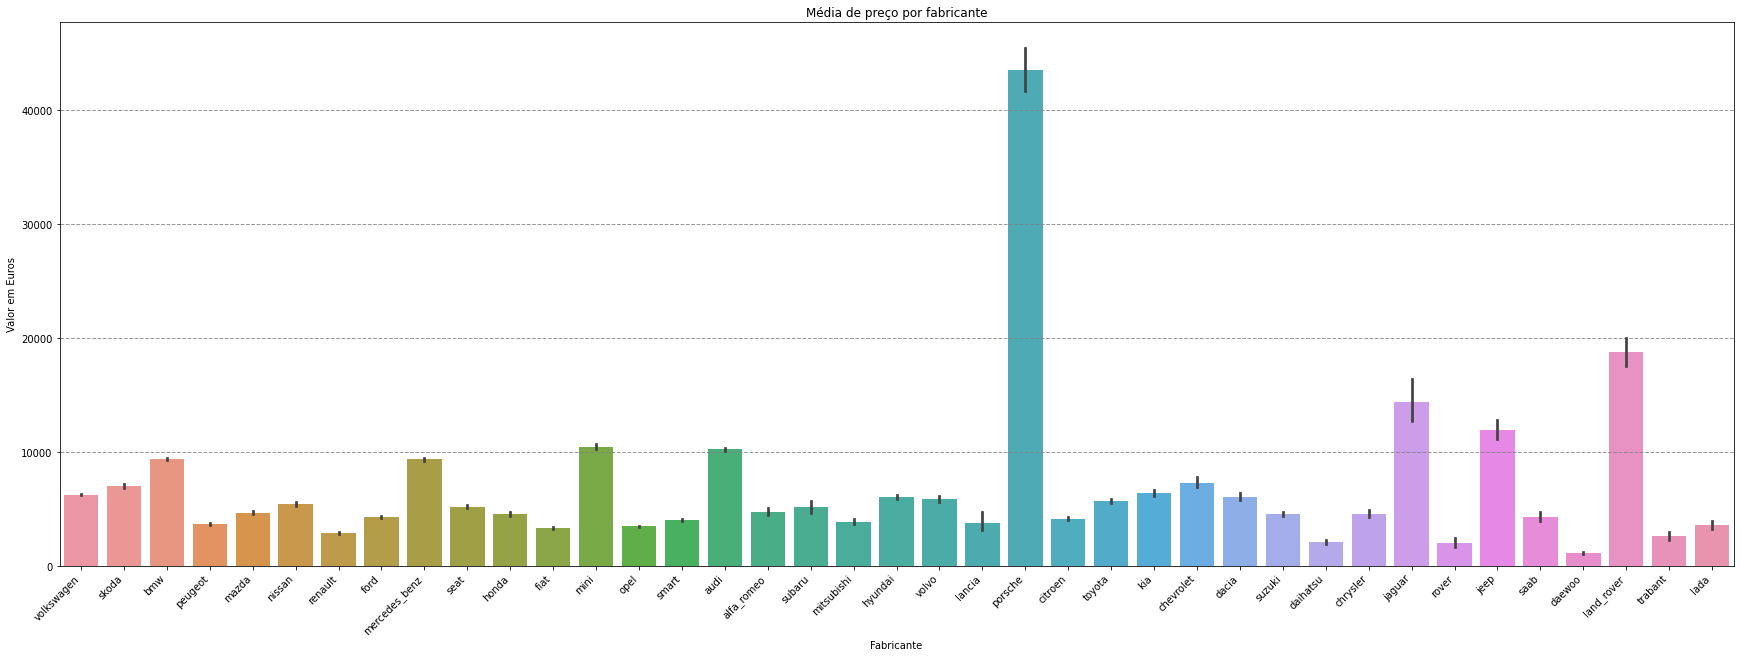

In [33]:
plt.figure(figsize=(30,10))
sns.barplot(data=df, y=df["price"], x="brand")
plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.title("Média de preço por fabricante")
plt.ylabel("Valor em Euros")
plt.xlabel("Fabricante")
plt.xticks(rotation=45, ha="right")
plt.show();

**Percebemos abaixo que a BMW e a Mercedes Benz estão entre as 3 fabricantes que tem alguns veículos entre os mais caros, porém sua média de preço geral não é tão elevada(como vimos acima), mostrando que esses veículos caros são poucos frequentes entre suas fabricantes, diferente da Land Rover, Audi e Mini que tem uma média de valores alta, porém não tem veículos entre os mais caros:**



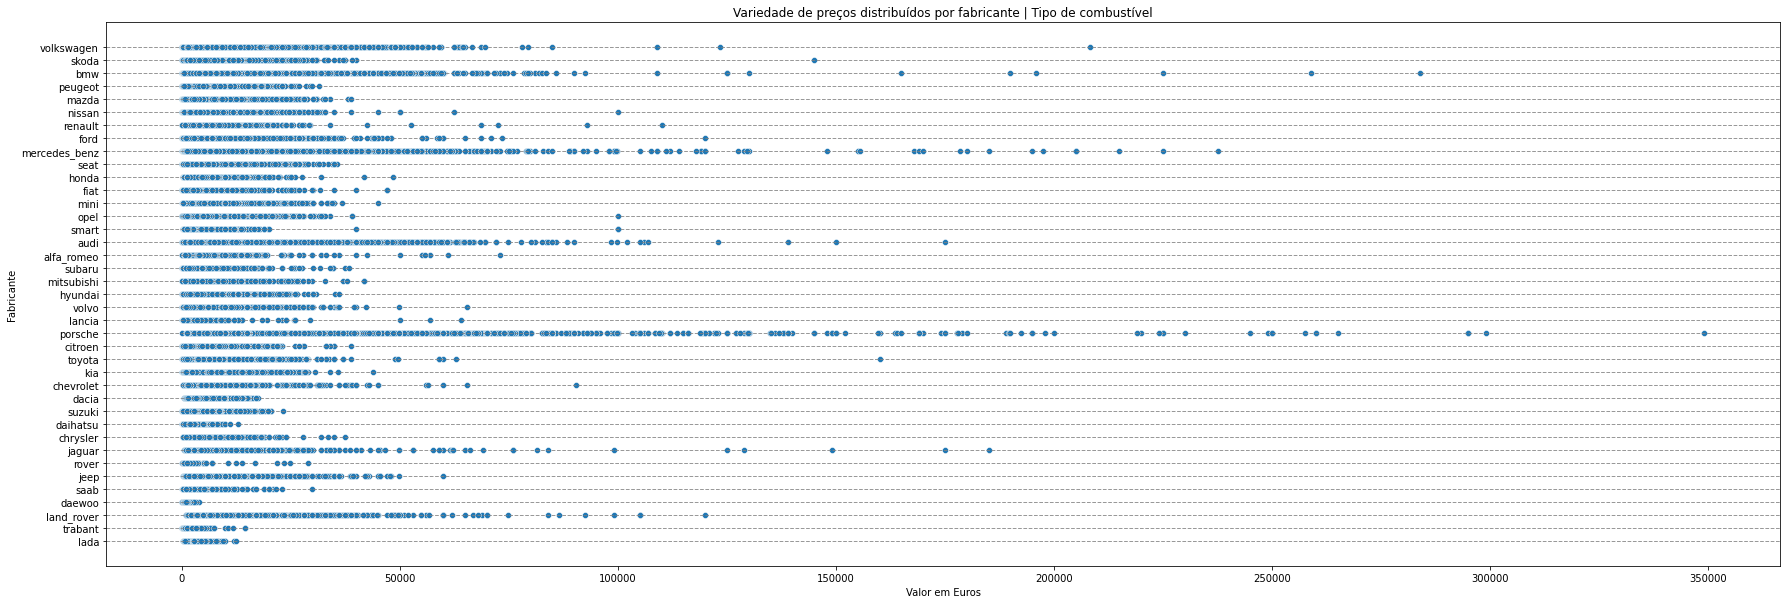

In [41]:
plt.figure(figsize=(30,10))
sns.scatterplot(data=df, x=df["price"], y="brand")
plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.title("Variedade de preços distribuídos por fabricante | Tipo de combustível")
plt.xlabel("Valor em Euros")
plt.ylabel("Fabricante")
plt.show();

#**Quais as fabricantes tem como tipo de combustível híbrido e elétrico mais caros?**



*   **Notamos que as fabricantes que tem veículos do tipo híbridos tem esse grupo como o tipo mais caro, exceto a Smart:**
*   **Os veículos da fabricante Smart tem uma média baixa de preço, mas os veículos elétricos tem um alto desvio padrão dos preços e tema média de preço mais elevada na fabricante.**



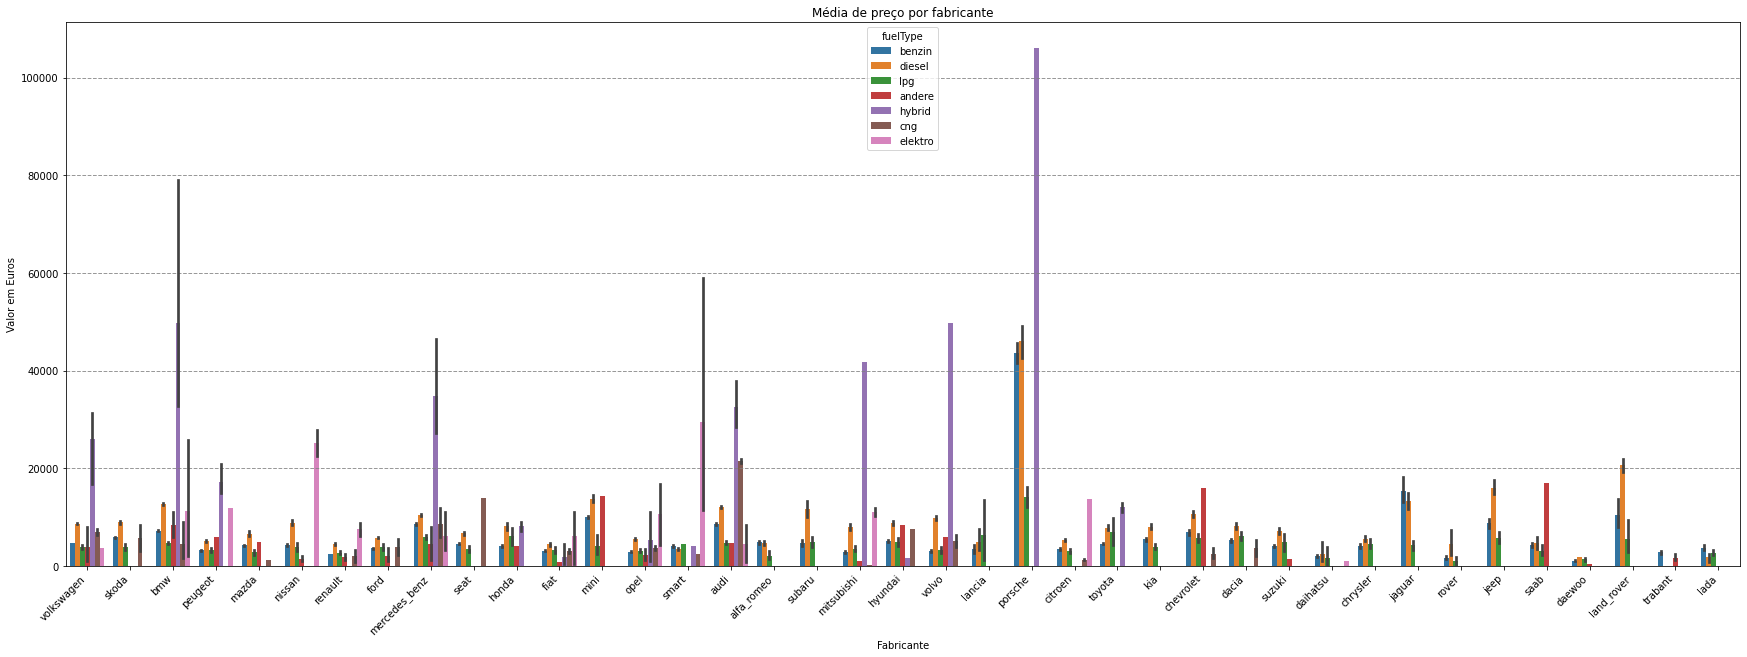

In [34]:
plt.figure(figsize=(30,10))
sns.barplot(data=df, y=df["price"], x="brand", hue="fuelType")
plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.title("Média de preço por fabricante")
plt.ylabel("Valor em Euros")
plt.xlabel("Fabricante")
plt.xticks(rotation=45, ha="right")
plt.show();

**64,62% de todos os veículos entre todas as fabricantes são movidos a gasolina, 33,56% são a diesel. Aproximadamente 98% do mercado de combustíveis.**

In [35]:
df["fuelType"].value_counts(normalize=True)

benzin     0.646230
diesel     0.335642
lpg        0.015068
cng        0.001770
hybrid     0.000822
andere     0.000253
elektro    0.000214
Name: fuelType, dtype: float64

**Vamos analisar os veículos elétricos da fabricante Smart, a média e o desvio padrão são extremamente elevados para a quantidade de tipos de veículos elétricos fabricados na Smart**

In [36]:
smart_fuel = df[df["brand"] == "smart"]
smart_fuel_ele = smart_fuel[smart_fuel["fuelType"] == "elektro"]
print(f"Total de {len(smart_fuel)} veículos, nas quais apenas {len(smart_fuel_ele)} são elétricos")

Total de 3338 veículos, nas quais apenas 6 são elétricos


**Apenas 0,01% dos veículos fabricados pela Smart são elétricos, porém como vimos acima são os mais caros, vamos ver os seus preços e quais modelos:**

In [37]:
smart_fuel = df[df["brand"] == "smart"]
smart_fuel["fuelType"].value_counts(normalize=True)

benzin     0.811564
diesel     0.185740
elektro    0.001797
cng        0.000300
hybrid     0.000300
lpg        0.000300
Name: fuelType, dtype: float64

**Veículos elétricos da Smart e seus dados gerais:**

In [38]:
smart_fuel_ele

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
65033,18900,test,kleinwagen,2016,automatik,48,fortwo,5000,3,elektro,smart,nein
69283,16850,test,cabrio,2012,automatik,48,fortwo,30000,11,elektro,smart,nein
94420,100000,test,kleinwagen,2013,automatik,0,andere,150000,11,elektro,smart,nein
162387,18900,test,coupe,2016,automatik,48,fortwo,5000,0,elektro,smart,nein
325848,17490,test,cabrio,2014,automatik,75,fortwo,20000,6,elektro,smart,nein
343522,4500,control,kleinwagen,2014,automatik,55,fortwo,5000,9,elektro,smart,nein


**A disparidade em números entre a média de preços de todos os veículos da fabricante Smart e os elétricos da mesma fabricante:**

**Geral:**

In [39]:
smart_fuel["price"].mean()

4018.451467944877

**Elétricos**

In [40]:
smart_fuel_ele["price"].mean()

29440.0